# 3D meshes
Examples of 3D meshes that can be automatically generated from withing ResIPy.

In [1]:
import sys
sys.path.append('../src')

from resipy import Project
import numpy as np
import pyvista as pv

datadir = '../src/examples/'

API path =  /media/jkl/data/phd/tmp/resipy/src/resipy
ResIPy version =  3.2.3
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
Creating tetrahedral mesh...fmd in gmshWrap.py: 16.343534
writing .geo to file completed, save location:
/media/jkl/data/phd/tmp/resipy/src/resipy/invdir

Using legacy msh parser...
Reading mesh3d.msh
Msh file version == 2.x
reading node coordinates...
Determining element type...Tetrahedra
Reading connection matrix...
ignoring 7581 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
interpolating topography onto mesh using triangulate interpolation...done
Done
A survey needs to imported before a memory usage estimate can be made
done


Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.


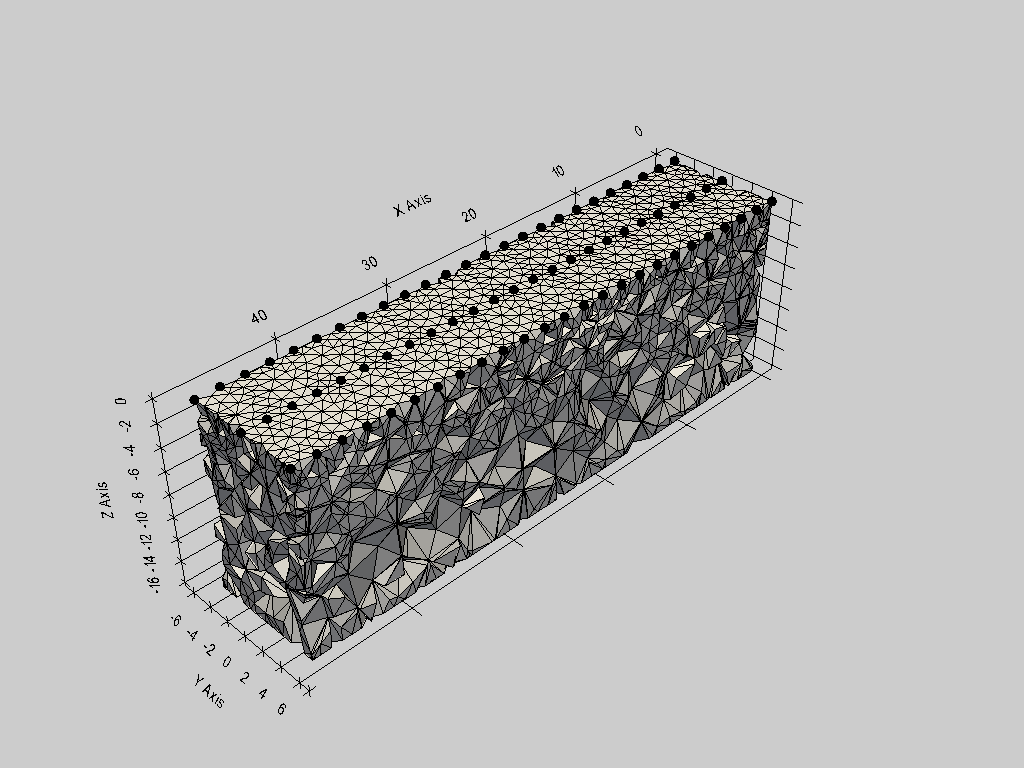

In [2]:
k1 = Project(typ='R3t')
k1.importElec(datadir + 'dc-3d/elec.csv')
k1.createMesh('tetra')
k1.showMesh()

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
Creating cylinder mesh...Using legacy msh parser...
Reading cylinder_mesh.msh
Msh file version == 2.x
reading node coordinates...
Determining element type...Tetrahedra
Reading connection matrix...
ignoring 18080 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
A survey needs to imported before a memory usage estimate can be made
done


Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.


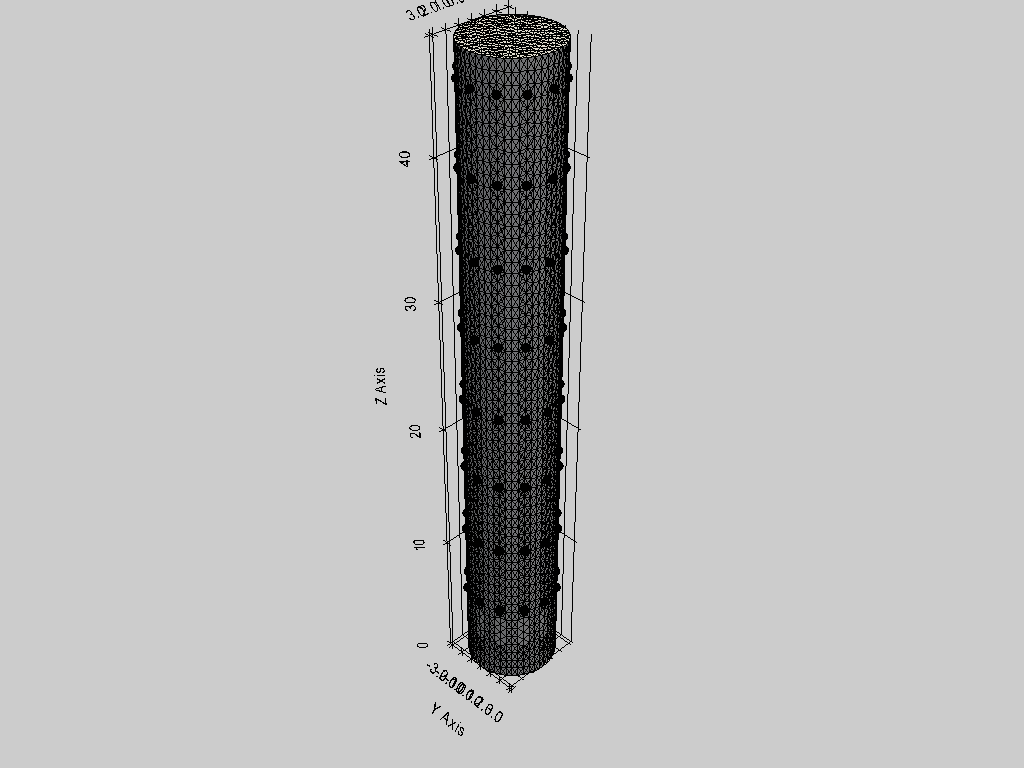

In [3]:
# column with tetrahedra
radius = 6.5/2 # cm
angles = np.linspace(0, 2*np.pi, 13)[:-1] # radian
celec = np.c_[radius*np.cos(angles), radius*np.sin(angles)]
elec = np.c_[np.tile(celec.T, 8).T, np.repeat(6.5+np.arange(0, 8*5.55, 5.55)[::-1], 12)]
k2 = Project(typ='R3t')
k2.setElec(elec)
k2.createMesh('cylinder', zlim=[0, 47.5], cl=0.8)
k2.showMesh(attr='res0')

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
Creating prism mesh...Using legacy msh parser...
Reading prism_mesh.msh
Msh file version == 2.x
reading node coordinates...
Determining element type...Prism
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
A survey needs to imported before a memory usage estimate can be made
done


Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.


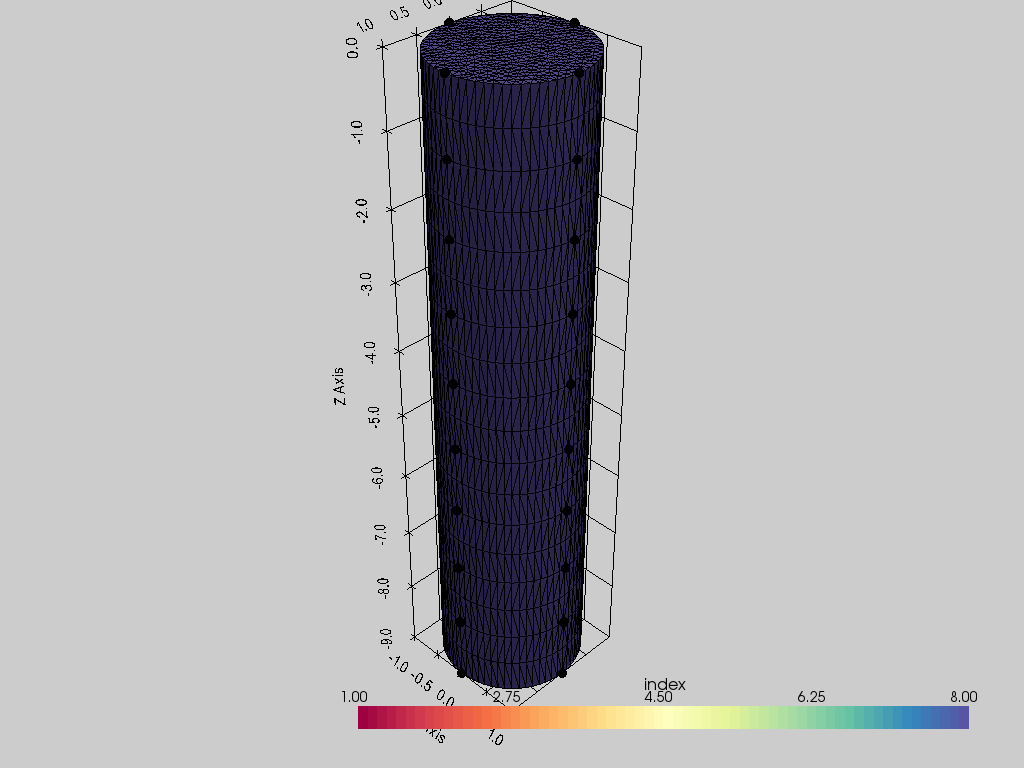

In [6]:
# cylinder with prism
k3 = Project(typ='R3t')
k3.importElec(datadir + 'dc-3d-column-prism/elec.csv') 
k3.createMesh(typ='prism', l=0.1, lemz=2)
k3.showMesh()

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
Creating tank mesh...Using legacy msh parser...
Reading tank_mesh.msh
Msh file version == 2.x
reading node coordinates...
Determining element type...Tetrahedra
Reading connection matrix...
ignoring 2942 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
A survey needs to imported before a memory usage estimate can be made
done


Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.


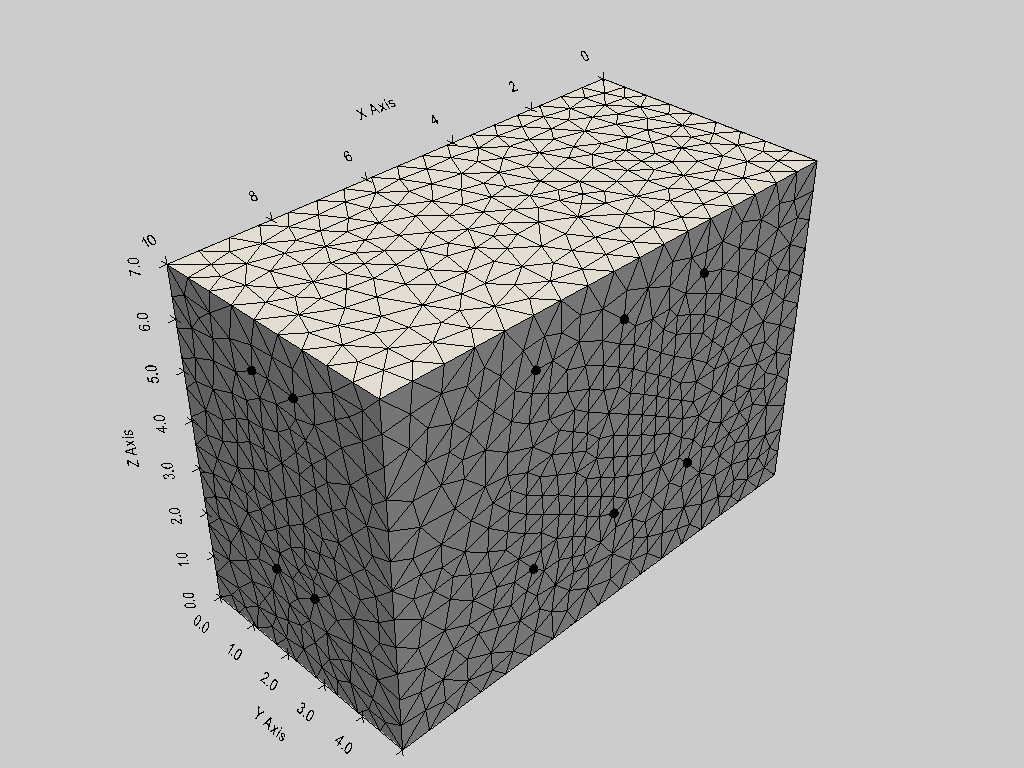

In [4]:
# tank mesh
elec = np.array([[0,2,2],[0,2,6],[0,3,2],[0,3,6],
                 [10,2,2],[10,2,6],[10,3,2],[10,3,6],
                 [3,0,2],[5,0,2],[7,0,2],[3,0,6],[5,0,6],[7,0,6],
                 [3,5,2],[5,5,2],[7,5,2],[3,5,6],[5,5,6],[7,5,6]
                ])
k4 = Project(typ='R3t')
k4.setElec(elec)
k4.createMesh('tank', origin=[0,0,0], dimension=[10, 5, 7])
k4.showMesh()

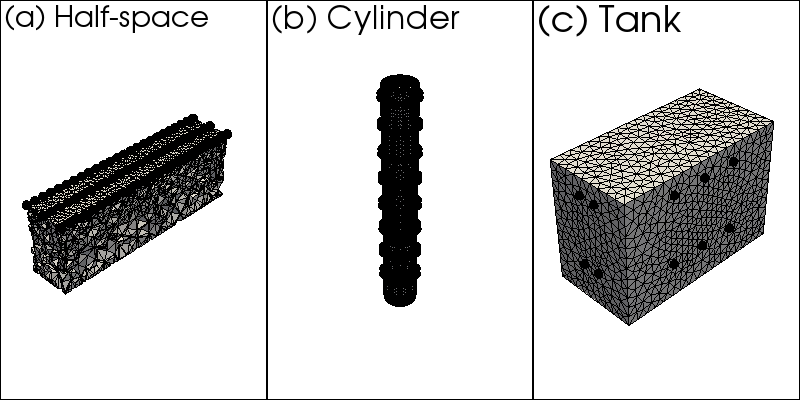

[(26.62807753368329, 24.12807753368329, 25.12807753368329),
 (5.0, 2.5, 3.5),
 (0.0, 0.0, 1.0)]

In [30]:
pl = pv.Plotter(shape=(1,3), window_size=[800, 400])
pl.subplot(0,0)
pl.add_text('(a) Half-space', color='k')
k1.showMesh(ax=pl, attr='res0', pvshow=False, pvgrid=False)
pl.subplot(0,1)
pl.add_text('(b) Cylinder', color='k')
k2.showMesh(ax=pl, attr='res0', pvshow=False, pvgrid=False)
pl.subplot(0,2)
pl.add_text('(c) Tank', color='k')
k4.showMesh(ax=pl, attr='res0', pvshow=False, pvgrid=False, background_color=(1,1,1)) # TODO
pl.show()

In [29]:
# trick to save a high resolution screenshot (basically render off screen)
# need to be executed before pl.show() so that the Plotter is not closed
hsize = 2000
pl.ren_win.OffScreenRenderingOn()
pl.enable_anti_aliasing()
pl.screenshot('../src/image/paper3d/mesh-types.jpg', transparent_background=False,
              window_size=[hsize, int(hsize*pl.window_size[1]/pl.window_size[0])])
pl.ren_win.SetSize([1000, 800])
pl.ren_win.OffScreenRenderingOff()
pl.ren_win.Render()
# NOTE pl.show() doesn't work after that